In [52]:
import tensorflow as tf
import numpy as np

In [3]:
a = tf.add(2,3)

In [4]:
a

<tf.Tensor 'Add_1:0' shape=() dtype=int32>

In [7]:
p = tf.placeholder(tf.float32, shape=[], name="p")
v2 = tf.Variable(2. , name="v2")
a = tf.add(p, v2)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # From the moment we initiliaze variables, until the end of the Session scope
  # We can access them
  print(sess.run(v2)) # -> 2.

  # On the other hand, intermediate variables has to be recalculated 
  # each time you want to access its value
  print(sess.run(a, feed_dict={p: 3})) # -> 5.

  # Even if calculated the value of a, it's no more accessible
  # the value of a has been freed off the memory
  try:
    sess.run(a) # Error ...
  except Exception as e:
    print(e)

2.0
5.0
You must feed a value for placeholder tensor 'p_2' with dtype float
	 [[Node: p_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'p_2', defined at:
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jonathanhilgart/anaconda/envs/dl/lib/python3.6/site-

In [15]:
a = tf.constant(3,shape=[3,4])

In [16]:
a.get_shape()

TensorShape([Dimension(3), Dimension(4)])

In [17]:
a.value_index

0

In [19]:
a.shape

TensorShape([Dimension(3), Dimension(4)])

In [30]:
my_tensor = tf.constant(0, shape=[6 ,2]) # <tf.Tensor 'Const_4:0' shape=(6, 2) dtype=int32>
my_dynamic_shape = tf.shape(my_tensor) # <tf.Tensor 'Shape:0' shape=(2,) dtype=int32>
# The shape is (2,) because my_tensor is a 2-D tensor, so the dynamic shape is a 1-D tensor containing size of my_tensor dimensions

my_reshaped_tensor = tf.reshape(my_tensor, [2, 3, 2]) # <tf.Tensor 'Reshape_2:0' shape=(2, 3, 2) dtype=int32>

# To access a dynamic shape value, you need to run your graph and feed any placeholder that your tensor my depended upon:
print(my_dynamic_shape.eval(session=tf.Session(), feed_dict={
    my_tensor: [[1., 2.], [1., 2.], [1., 2.], [1., 2.], [1., 2.], [1., 2.]]}))



[6 2]


In [29]:
print(my_tensor.eval(session = tf.Session(), 
                     feed_dict ={[[1., 2.], [1., 2.], [1., 2.], [1., 2.], [1., 2.], [1., 2.]]}))

TypeError: unhashable type: 'list'

In [31]:
my_tensor.shape

TensorShape([Dimension(6), Dimension(2)])

In [25]:
my_dynamic_shape

<tf.Tensor 'Shape:0' shape=(2,) dtype=int32>

In [32]:

batch_size = my_tensor.get_shape()[0] # Dimension(None)
print(batch_size)
# -> ? 

6


In [43]:

batch_size = tf.shape(my_tensor)[0] # <tf.Tensor 'strided_slice:0' shape=() dtype=int32>
print(batch_size)

Tensor("strided_slice_8:0", shape=(), dtype=int32)


In [42]:
tf.shape(my_tensor)

<tf.Tensor 'Shape_11:0' shape=(2,) dtype=int32>

In [51]:
x = tf.Variable(0)
tf.assign(x,x+1)

<tf.Tensor 'Assign_5:0' shape=() dtype=int32_ref>

In [53]:
tensor = np.array([[[1,2],
                   [3,2],
                   [3,4]]])

In [61]:
my_tensor.graph()

TypeError: 'Graph' object is not callable

In [57]:
with tf.Session() as sess:
    print(sess.run(my_tensor))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [71]:
state = tf.Variable([[1,2],
                    [2,3]])

In [72]:
state.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [86]:
update = tf.add(state,1)
assign = tf.assign(state,update)

In [77]:
update

<tf.Tensor 'Add_5:0' shape=(2, 2) dtype=int32>

In [88]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(assign))

[[2 3]
 [3 4]]
[[3 4]
 [4 5]]
[[4 5]
 [5 6]]
[[5 6]
 [6 7]]
[[6 7]
 [7 8]]


In [92]:
input1 = tf.placeholder(dtype=tf.float32)

In [93]:
input2 = tf.placeholder(dtype=tf.float32)

In [94]:
adding = tf.add(input1,input2)

In [101]:
with tf.Session() as sess:
    tf.global_variables_initializer()
    print(sess.run(adding, feed_dict={input1:[5.],input2:[6.]}))

[ 11.]


In [107]:
# name scop
with tf.variable_scope('foo'):
    with tf.variable_scope('boo',reuse=True):
        test = tf.get_variable('v',1)
        tf.get_variable_scope()
        test1 = tf.get_variable('v',1)

In [105]:
test.name

'foo/boo/v:0'

In [108]:
test1.name

'foo/boo/v:0'

In [123]:
## linear regression
X_ = tf.Variable([[1,2],
                    [2,3]])
X_data = np.arange(100,step=.1)
y_data = X_data**.7*np.sin(X_data/10)
with tf.variable_scope('linear_regression',reuse=True):
    W = tf.get_variable('weights',(1,1),initializer=tf.random_normal_initializer())
    b = tf.get_variable('bias', (1,), initializer=tf.constant_initializer(0))
    y_pred = tf.matmul(X_,W) 
    loss = tf.reduce_sum((y-y_pred)**2/n_samples)
    
    opt = tf.train.AdamOptimizer()
    opt_min = opt.minmize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(opt_min,feed_dict={X : X_data, y:y_data})

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type int32 of argument 'a'.

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np

from numpy import genfromtxt
from sklearn.datasets import load_boston

In [125]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [126]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [168]:
f[0]

array([ 1.        , -0.41771335,  0.28482986, -1.2879095 , -0.27259857,
       -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
       -0.66660821, -1.45900038,  0.44105193, -1.0755623 ])

In [183]:
l.shape

(506, 1)

In [136]:
n_dim

14

In [172]:
train_x.shape

(410, 14)

In [311]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [312]:
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [313]:
type(train_y[0][0])

numpy.float64

In [314]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    
    


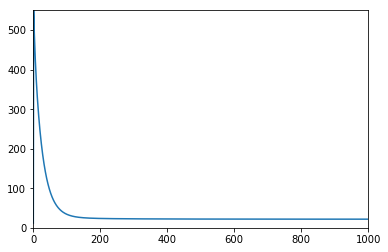

In [315]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

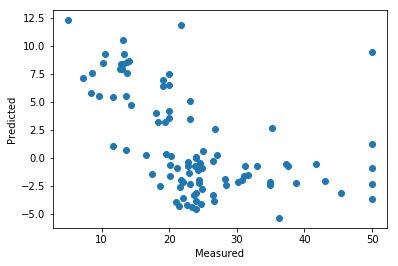

In [355]:
pred_y = sess.run(y_, feed_dict={X: test_x})
#mse = tf.reduce_mean(tf.square(pred_y - test_y))
#print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
#ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [169]:
 np.arange(100,step = 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [359]:

x = np.arange(100,step = .1).reshape(500,2).astype(float)
y = np.array([_**5.3*np.sin(-2)/2 for _ in range(500)]).reshape(-1,1)
y.shape

(500, 1)

In [360]:
x.shape

(500, 2)

In [361]:
type(x[0][0])

numpy.float64

In [362]:
y_prediction

<tf.Tensor 'MatMul_25:0' shape=(?, 1) dtype=float32>

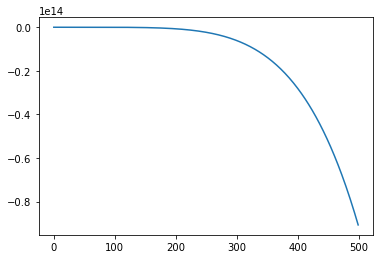

In [363]:
plt.plot(y)

In [364]:
n_dimens = x.shape[1]
n_dimens

2

In [365]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X_ = tf.placeholder(tf.float32,[None,n_dimens],name='placeholder_X')
Y_ = tf.placeholder(tf.float32,[None,1],name ='placeholder_y')
W_ = tf.Variable(tf.ones([n_dimens,1.0]))
#b = tf.Variable(initial_value=1,tf.float64)

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [366]:
y_prediction = tf.matmul(X_,W_)

In [367]:
cost = tf.reduce_sum(tf.square(y_prediction - Y_))
#cost = tf.reduce_mean(tf.square(y_prediction - Y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [368]:
sess = tf.Session()
sess.run(init)

In [369]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X_:x,Y_:y})
    predictions = sess.run(y_prediction,feed_dict={X_: x,Y_: y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X_: x,Y_: y}))
    pred_y = sess.run(y_prediction, feed_dict={X_: x})
    

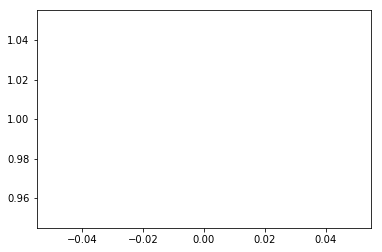

In [370]:
plt.plot(range(len(cost_history)),cost_history)
#plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

In [329]:
cost_history

array([  1.00000000e-02,   6.67017763e+15,   5.73818851e+15, ...,
         5.55738489e+15,   5.55730758e+15,   5.55722919e+15])

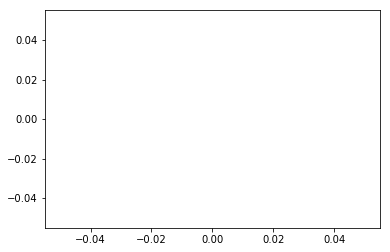

In [349]:
plt.plot(pred_y,y)